A time series is a set of data points ordered in time

Ideally, the data is equally spaced in time(every hour, every minute, etc.)

Examples: 
- Closing value of stock
- Household's electricity consumption
- Temperature outside

In [4]:
!pip install utilsforecast

  Attempting uninstall: narwhals
    Found existing installation: narwhals 1.42.0
    Uninstalling narwhals-1.42.0:
      Successfully uninstalled narwhals-1.42.0



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from utilsforecast.plotting import plot_series
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import *

import warnings
warnings.filterwarnings("ignore")


In [10]:
df = pd.read_csv("daily_sales_french_bakery.csv",parse_dates=["ds"]) #treat ds column as date and time
df = df.groupby('unique_id').filter(lambda x:len(x)>=28)
df = df.drop(columns=['unit_price'])
df.head()



,unique_id,ds,y
0,12 MACARON,2022-07-13,10.0
1,12 MACARON,2022-07-14,0.0
2,12 MACARON,2022-07-15,0.0
3,12 MACARON,2022-07-16,10.0
4,12 MACARON,2022-07-17,30.0


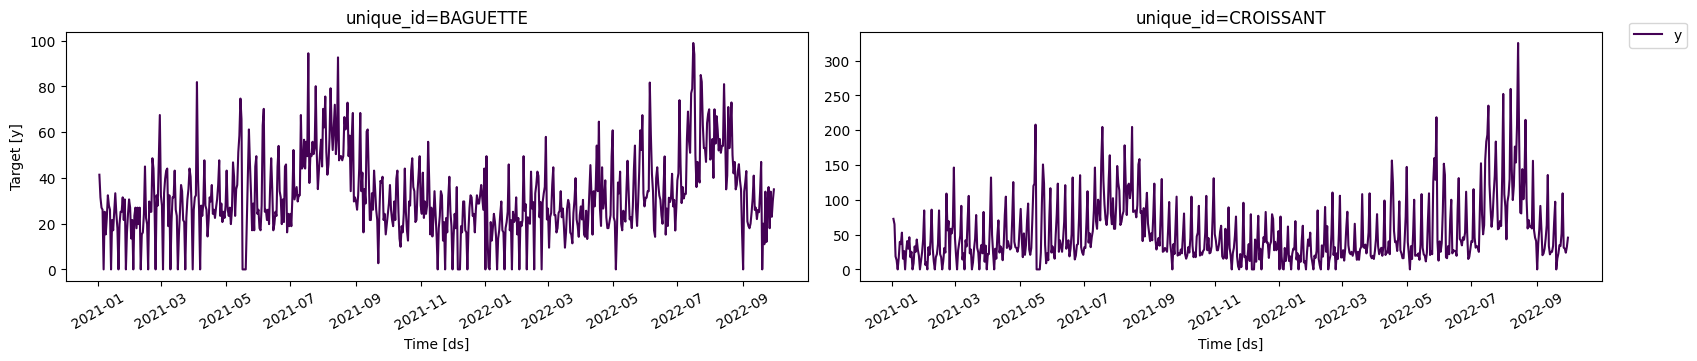

In [11]:
plot_series(df=df, ids=["BAGUETTE","CROISSANT"],palette="viridis")

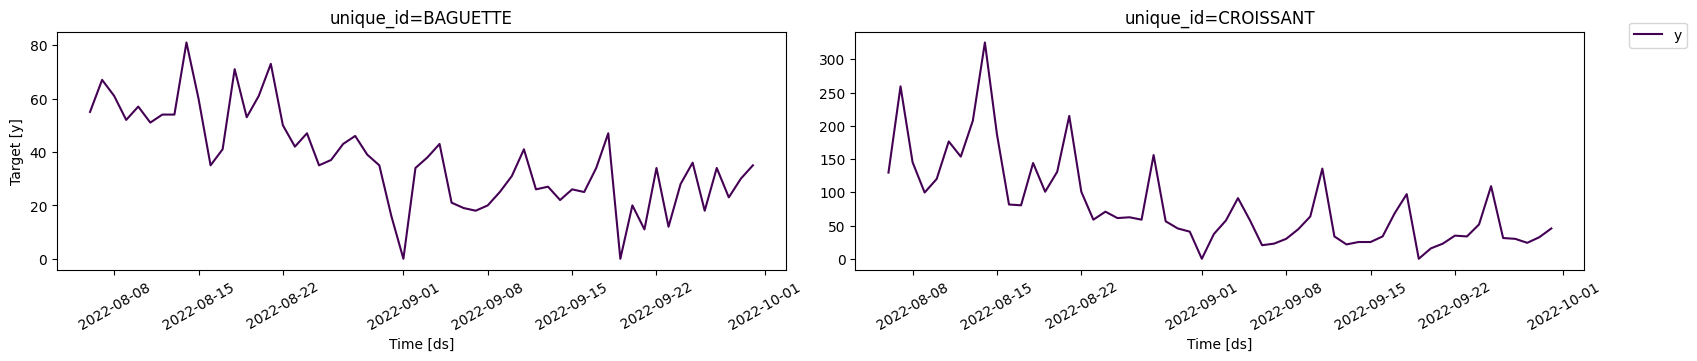

In [12]:
plot_series(df=df, ids=["BAGUETTE","CROISSANT"],max_insample_length=56,palette="viridis")

In [13]:
from statsforecast import StatsForecast
from statsforecast.models import Naive,HistoricAverage,WindowAverage,SeasonalNaive


In [15]:
horizon = 7
models = [
    Naive(),
    HistoricAverage(),
    WindowAverage(window_size=7),
    SeasonalNaive(season_length=7)
]

sf = StatsForecast(models = models, freq="D")#object responsible for training, fitting ,pred, cross valid etc..
sf.fit(df=df)
preds = sf.predict(h=horizon)


In [16]:
preds.head()

,unique_id,ds,Naive,HistoricAverage,WindowAverage,SeasonalNaive
0,12 MACARON,2022-09-29,10.0,8.974359,2.857143,0.0
1,12 MACARON,2022-09-30,10.0,8.974359,2.857143,0.0
2,12 MACARON,2022-10-01,10.0,8.974359,2.857143,10.0
3,12 MACARON,2022-10-02,10.0,8.974359,2.857143,0.0
4,12 MACARON,2022-10-03,10.0,8.974359,2.857143,0.0


In [ ]:
plot_series(
    df=df,
    forecasts_df = preds,
    ids=["BAGUETTE","CROISSANT"],
    max_insample_length=28,
    palette="viridis")
